# Experiment 1 - Base model vs base model with reasoning

In [ ]:
! tar czf Testing.tar *

In [1]:
! nvidia-smi

Sun Sep 28 12:16:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.03              Driver Version: 575.64.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:01:00.0 Off |                  Off |
|  0%   47C    P8             23W /  450W |      41MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [32]:
import pickle
import random
import math

In [ ]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

# Notebook variables

In [33]:
exp_number = 1

seeds = range(1,51)
n_episodes = 1
max_steps = 100
game = "simple"

In [ ]:
max_scores = [8,10,7,10,7,10,7,10,7,7,
              7,10,10,8,10,10,10,10,7,7,
              8,10,10,10,10,7,7,7,7,7,
              8,8,7,10,7,10,10,10,7,8,
              7,10,7,10,10,7,10,7,10,8]

In [ ]:
with open(f"./Experiment {exp_number}/max_scores.pickle", "wb") as f:
    pickle.dump(max_scores, f)
    print("Data pickled.")

Data pickled.


In [34]:
with open(f"./Experiment {exp_number}/max_scores.pickle", "rb") as f:
    max_scores = pickle.load(f)
    print("Data loaded.")

Data loaded.


# Game generation

In [95]:
import subprocess

for seed in seeds:
    subprocess.run(["tw-make", f"tw-{game}",
                    "--rewards", "dense", "--goal", "detailed", "--silent", "--force",
                    "--seed", f"{seed}", "--output", f"games/{game}/seed{seed}.z8"]) 

# Game playing

In [5]:
results_all_seeds = []
for seed in seeds:
    results = play(LLMAgentSelfEvaluate(selfeval_turns=-1, prompt_version="no_selfeval",
                                        verbose=False, log=f"./logs/{game}/basemodel.log"),
            f"games/{game}/seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
    results_all_seeds.append(results[0]) # only one episode
with open(f"./Experiment {exp_number}/basemodel_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f)
    print("Data pickled.")
    f.close()

games/simple/seed1.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 8.
games/simple/seed2.z8 .  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed3.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed7.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed9.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed11.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 .  	avg. steps: 100.0; avg. score:  3.0 / 10.
games/simple/seed13.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed14.z8 .  	avg. steps:  10.0; avg. score:  8.0 / 8.
games/simple/seed15.z8 .  	avg. steps:  14.0; avg. 

In [7]:
results_all_seeds = []
max_scores = []

for seed in seeds:
    results, max_score = play(LLMAgentSelfEvaluate(selfeval_turns=1, prompt_version="no_selfeval", reads_own_reasoning=True,
                                        verbose=False, log=f"./logs/{game}/reasoning.log"),
            f"games/{game}/seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes, return_max_score=True)
    results_all_seeds.append(results[0]) # only one episode
    max_scores.append(max_score)
with open(f"./Experiment {exp_number}/reasoning_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f)
    print("Data pickled.")
    f.close()

games/simple/seed1.z8 .  	avg. steps:  19.0; avg. score:  8.0 / 8.
games/simple/seed2.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed3.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps:  14.0; avg. score: 10.0 / 10.
games/simple/seed7.z8 .  	avg. steps:  18.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed9.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I give up. The door is locked and I can't figure out how to unlock it. Maybe I need to try something else. Let me check the room again. There's a chest drawer, a closed antique trunk, a king-size bed, and a closed wooden door. I have the old key. Maybe I need to use the key on the door again. But the game says it's fixed. I'm stuck. Maybe the door is locked and I need to find another way. But the problem says to use the key. I'll try "unlock wooden door" one more time.' was truncated to 'I give up. The door is locked and I can't figure out how to unlock it. Maybe I need to try something else. Let me check the room again. There's a chest drawer, a closed antique trunk, a king-size be'.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps:  25.0; avg. score:  7.0 / 7.
games/simple/seed11.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I'm stuck in the Bedroom and can't proceed further. The game isn't allowing me to move east or west, and the only items here are the open trunk and the bed. I need to find a way to get to the garden to lift the milk. Maybe there's a hidden path or a different item I can use. The trunk is empty, and the bed is solid. I'm not sure what to do next. The task says to go east from the bedroom, but it's not working. Maybe I need to try a different command or look for something else. I'll keep trying to find a way out.' was truncated to 'I'm stuck in the Bedroom and can't proceed further. The game isn't allowing me to move east or west, and the only items here are the open trunk and the bed. I need to find a way to get to the garden'.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/j

.  	avg. steps: 100.0; avg. score:  5.0 / 10.
games/simple/seed13.z8 .  	avg. steps:  15.0; avg. score: 10.0 / 10.
games/simple/seed14.z8 .  	avg. steps:  17.0; avg. score:  8.0 / 8.
games/simple/seed15.z8 .  	avg. steps:  12.0; avg. score: 10.0 / 10.
games/simple/seed16.z8 .  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed17.z8 .  	avg. steps:  14.0; avg. score: 10.0 / 10.
games/simple/seed18.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed19.z8 .  	avg. steps:   8.0; avg. score:  7.0 / 7.
games/simple/seed20.z8 .  	avg. steps:   8.0; avg. score:  7.0 / 7.
games/simple/seed21.z8 .  	avg. steps:  10.0; avg. score:  8.0 / 8.
games/simple/seed22.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed23.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed24.z8 .  	avg. steps:  19.0; avg. score: 10.0 / 10.
games/simple/seed25.z8 .  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed26.z8 .  	avg. steps:   8.0; avg. score:  7.

# Data aggregation for visualization

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [71]:
basemodel = []
reasoning = []

final_arrays = {"basemodel": basemodel, "reasoning": reasoning}

for model in final_arrays.keys():
    with open(f"./Experiment {exp_number}/{model}_{game}.pickle", "rb") as f:
        results_all_seeds = pickle.load(f)
    final_scores = [run[-1][2] for run in results_all_seeds] # last step, score
    final_arrays[model] = np.array(final_scores)

# Visualization

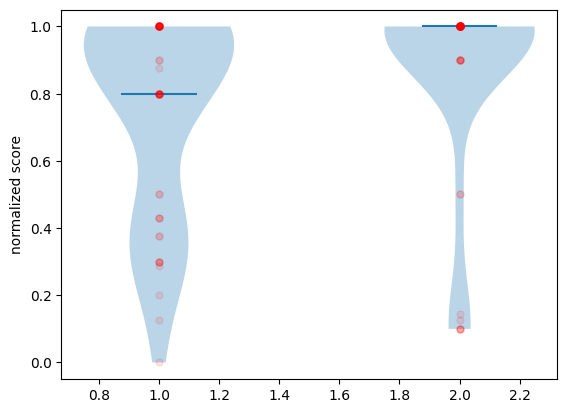

In [9]:
fig, ax = plt.subplots()
data = list(final_arrays.values())
labels = ["base model", "model with reasoning"]
ax.set_ylabel("normalized score")

# boxplot = ax.boxplot(data, patch_artist=True, tick_labels=labels, showfliers=False)
# colors = ["skyblue", "orange"]
# for box, color in zip(boxplot["boxes"], colors):
#     box.set_facecolor(color)

violin = ax.violinplot(data, showmeans=False, showmedians=True, showextrema=False)
for i in range(len(data)):
    points = data[i]
    x = np.random.normal(1+i, 0.0, size=len(points))
    ax.plot(x, points, 'r.', alpha=0.1, markersize=10)

plt.show()

In [94]:
custom_palette = sns.color_palette(['#c44e52', '#8172b3'])
mean_palette = sns.color_palette(["#883739", "#544a74"])

In [84]:
means = []

for array in final_arrays.values():
    means.append(np.mean(array))

In [96]:
print(means)

[np.float64(27.11290685347999), np.float64(133.11722627519998)]


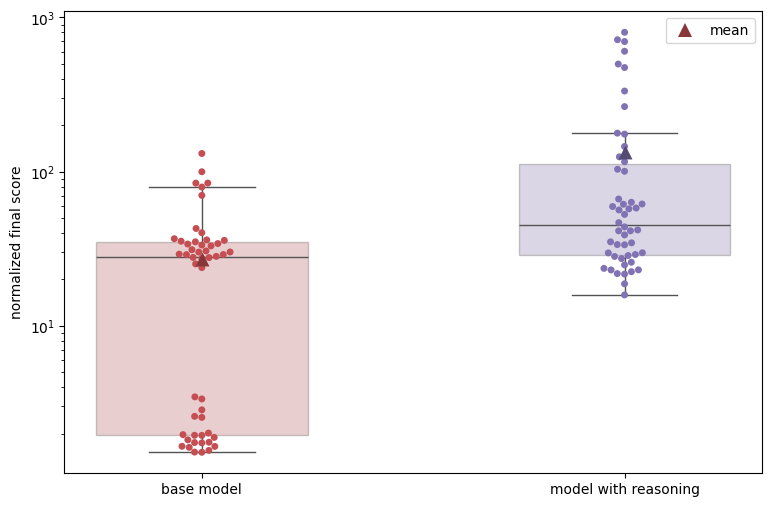

In [95]:
fig, ax = plt.subplots(figsize=(9,6))

data_combined = np.concatenate(list(final_arrays.values()))
labels = ["base model", "model with reasoning"]
category_feature = ["base model"] * len(final_arrays["basemodel"]) + ["model with reasoning"] * len(final_arrays["reasoning"])

swarm = sns.swarmplot(
    x=category_feature,  # Group labels
    ax=ax,
    y=data_combined,  # Numeric variable
    palette=custom_palette,  # Color set used
    hue=category_feature,  # Add a legend
    size=5
)

mean = sns.swarmplot(
    x=["base model", "model with reasoning"],
    hue=["mean", "_"],
    y=means,
    ax=ax,
    palette=mean_palette,
    size=10,
    marker="^",
)

box = sns.boxplot(x=category_feature, y=data_combined,
                  boxprops={"alpha": 0.3}, showfliers=False,
                  hue=category_feature, palette=custom_palette,
                  width=0.5)

# violin = sns.violinplot(x=category_feature, y=data_combined,
#                         cut=0, inner=None, fill=True,
#                         palette=custom_palette, hue=category_feature, alpha=0.05,
#                         bw_method=0.3, bw_adjust=1, common_norm=True)
# violin = sns.violinplot(x=category_feature, y=data_combined,
#                         cut=0, inner=None, fill=False,
#                         palette=custom_palette, hue=category_feature, alpha=0.5,
#                         bw_method=0.3, bw_adjust=1, common_norm=True)

# ax.set_title(f"Final score over {len(seeds)} seeds in Simple Game")
ax.semilogy()
ax.set_ylabel("normalized final score")
plt.show()